<a href="https://colab.research.google.com/github/MustafaGurbuz/ArtificleIntelligence/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

veri = pd.read_csv("/content/drive/My Drive/YZHomeWork/telefon_fiyat_değişimi.csv")

label_encoder = LabelEncoder().fit(veri.price_range)
labels = label_encoder.transform(veri.price_range)
classes = list(label_encoder.classes_)


In [0]:
X = veri.drop(["price_range"],axis=1)
y=labels

nb_features=20
nb_classes=len(classes)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
X_train = np.array(X_train).reshape(1400,20,1)
X_test = np.array(X_test).reshape(600,20,1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Flatten, LSTM, BatchNormalization

model = Sequential()
model.add(LSTM(512,input_shape=(nb_features,1)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(2018,activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(Dense(nb_classes,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 512)               1052672   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2018)              1035234   
_________________________________________________________________
dense_8 (Dense)              (None, 1024)             

In [0]:
from keras import backend as K

def recall_m(y_true,y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred,0,1)))
  possible_positives = K.sum(K.round(K.clip(y_true,0,1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true,y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred,0,1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred,0,1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision

def f1_m(y_true,y_pred):
  precision= precision_m(y_true,y_pred)
  recall= recall_m(y_true,y_pred)
  return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [28]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy",f1_m,precision_m,recall_m])
score=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
44/44 [==============================] - 14s 312ms/step - loss: 1.3540 - accuracy: 0.3493 - f1_m: 0.1301 - precision_m: 0.4483 - recall_m: 0.0817 - val_loss: 1.3797 - val_accuracy: 0.2500 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
44/44 [==============================] - 13s 306ms/step - loss: 1.2341 - accuracy: 0.4164 - f1_m: 0.2252 - precision_m: 0.5934 - recall_m: 0.1480 - val_loss: 1.3916 - val_accuracy: 0.2483 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/100
44/44 [==============================] - 13s 297ms/step - loss: 1.1926 - accuracy: 0.4493 - f1_m: 0.2676 - precision_m: 0.6446 - recall_m: 0.1830 - val_loss: 1.4324 - val_accuracy: 0.2483 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/100
44/44 [==============================] - 13s 296ms/step - loss: 1.1252 - accuracy: 0.4693 - f1_m: 0.3455 - precision_m: 0.6467 - recall_m: 0.2410 - 

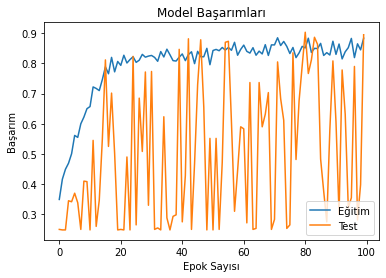

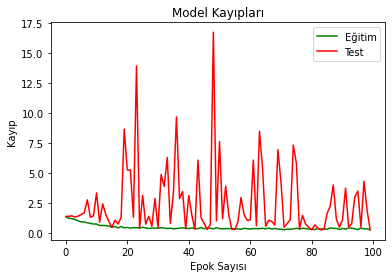

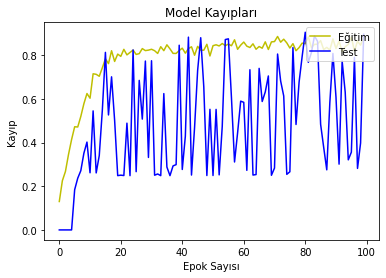

In [30]:
import matplotlib.pyplot as plt

plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Model Başarımları")
plt.xlabel("Epok Sayısı")
plt.ylabel("Başarım")
plt.legend(["Eğitim","Test"], loc="lower right")
plt.show()

plt.plot(model.history.history["loss"],color='g')
plt.plot(model.history.history["val_loss"],color='r')
plt.title("Model Kayıpları")
plt.xlabel("Epok Sayısı")
plt.ylabel("Kayıp")
plt.legend(["Eğitim","Test"], loc="upper right")
plt.show()

plt.plot(model.history.history["f1_m"],color="y")
plt.plot(model.history.history["val_f1_m"],color='b')
plt.title("Model Kayıpları")
plt.xlabel("Epok Sayısı")
plt.ylabel("Kayıp")
plt.legend(["Eğitim","Test"], loc="upper right")
plt.show()